# https://servicos.dnit.gov.br/dnitcloud/index.php/s/oTpPRmYs5AAdiNr?path=%2FSNV%20Bases%20Geom%C3%A9tricas%20(2013-Atual)%20(SHP)

                                            geometry
0  LINESTRING (-47.85885 -15.68816, -47.85879 -15...
1  LINESTRING (-47.83735 -15.6818, -47.83719 -15....
2  LINESTRING (-47.8076 -15.66586, -47.80747 -15....
3  LINESTRING (-47.78774 -15.65664, -47.7876 -15....
4  LINESTRING (-47.70599 -15.61521, -47.70587 -15...
None


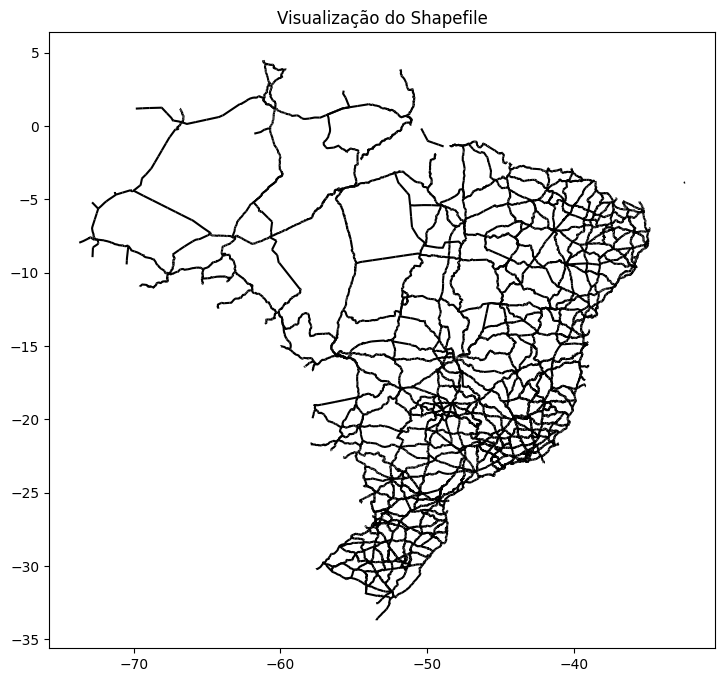

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caminho do shapefile (pode ser .shp ou só a pasta com os arquivos)
shapefile_path = "SNV_202507A.shp"

# Ler o shapefile
gdf = gpd.read_file(shapefile_path)

# Mostrar informações básicas
print(gdf.head())
print(gdf.crs)

# Plotar
gdf.plot(figsize=(10, 8), edgecolor="black")
plt.title("Visualização do Shapefile")
plt.show()


In [3]:
gdf = gpd.read_file(shapefile_path)

# Se não tiver CRS definido, definir manualmente
if gdf.crs is None:
    print("⚠️ Shapefile sem CRS definido. Definindo como WGS84 (EPSG:4326).")
    gdf = gdf.set_crs("EPSG:4326")

# Se ainda estiver em graus, reprojetar para metros
if gdf.crs.is_geographic:
    gdf = gdf.to_crs(epsg=3857)

# Calcular comprimento de cada trecho
gdf["comprimento_m"] = gdf.length

print(f"Quantidade de trechos: {len(gdf)}")
print(gdf[["comprimento_m"]].head())
print(f"Comprimento total: {gdf['comprimento_m'].sum():.2f} m")

⚠️ Shapefile sem CRS definido. Definindo como WGS84 (EPSG:4326).
Quantidade de trechos: 7626
   comprimento_m
0    2507.026431
1    3820.232442
2    2455.895572
3   10294.585677
4    3978.273959
Comprimento total: 136720917.47 m


In [4]:
gdf_ordenado = gdf.sort_values(by="comprimento_m", ascending=False)

# Mostrar os 5 primeiros
print(gdf_ordenado.head())

                                               geometry  comprimento_m
2249  LINESTRING (-6070084.535 -253492.432, -6069991...  343975.410310
2805  LINESTRING (-6525153.91 -1245866.979, -6535498...  261059.713401
2642  LINESTRING (-6350274.524 -121032.65, -6340661....  226499.807038
6792  LINESTRING (-5483111.953 -926411.123, -5445840...  217772.944068
183   LINESTRING (-5122438.016 -1628784.272, -512241...  196981.979947


# Apenas rodovias da região SUL

In [7]:
import pandas as pd
# Leitura dos shapefiles de cada estado
rs = gpd.read_file("../analise espacial/shapefiles/RS_Municipios_2024.shp").to_crs(epsg=4326)
sc = gpd.read_file("../analise espacial/shapefiles/SC_Municipios_2024.shp").to_crs(epsg=4326)
pr = gpd.read_file("../analise espacial/shapefiles/PR_Municipios_2024.shp").to_crs(epsg=4326)

# Unifica os três GeoDataFrames
cidades_sul = gpd.GeoDataFrame(pd.concat([rs, sc, pr], ignore_index=True), crs="EPSG:4326")

In [8]:
gdf = gdf.to_crs(cidades_sul.crs)

C:\Users\adria\AppData\Local\Temp\ipykernel_21292\2882186250.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  rodovias_sul.to_file("rodovias_sul.shp")
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'comprimento_m' to 'compriment'
  ogr_write(


<Axes: >

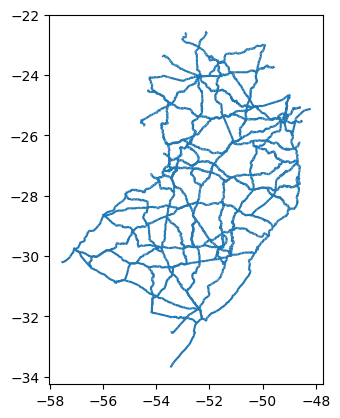

In [9]:
rodovias_sul = gpd.overlay(gdf, cidades_sul, how='intersection')

# Salvar shapefile só da região Sul
rodovias_sul.to_file("rodovias_sul.shp")

# Visualizar
rodovias_sul.plot()

In [10]:
# Se ainda estiver em graus, reprojetar para metros
if rodovias_sul.crs.is_geographic:
    rodovias_sul = rodovias_sul.to_crs(epsg=3857)

# Calcular comprimento de cada trecho
rodovias_sul["comprimento_m"] = rodovias_sul.length

print(f"Quantidade de trechos: {len(rodovias_sul)}")
print(rodovias_sul[["comprimento_m"]].head())
print(f"Comprimento total: {rodovias_sul['comprimento_m'].sum():.2f} m")

Quantidade de trechos: 2473
   comprimento_m
0    4070.683523
1    2885.021693
2    6200.728682
3    3793.880959
4    2725.480633
Comprimento total: 23162688.87 m


In [13]:
gdf_ordenado = rodovias_sul.sort_values(by="comprimento_m", ascending=False)

# Mostrar os 5 primeiros
gdf_ordenado.head(50)

,comprimento_m,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
2291,102311.310349,4317301,Santa Vitória do Palmar,430009,Pelotas,4302,Pelotas,43,Rio Grande do Sul,RS,4,Sul,S,None,None,5206.977,"LINESTRING (-5873822.182 -3887128.855, -587382..."
83,95303.127497,4312500,Mostardas,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,None,None,1977.442,"LINESTRING (-5616853.848 -3568100.884, -561684..."
1810,72809.894126,4306908,Encruzilhada do Sul,430040,Santa Cruz do Sul,4308,Santa Cruz do Sul - Lajeado,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3347.861,"LINESTRING (-5843383.552 -3572938.518, -584336..."
1772,70983.977887,4322400,Uruguaiana,430015,Uruguaiana,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,4322400,Internacional de Uruguaiana/Brasil,5702.098,"LINESTRING (-6309911.876 -3427409.862, -630991..."
100,63721.765664,4315602,Rio Grande,430009,Pelotas,4302,Pelotas,43,Rio Grande do Sul,RS,4,Sul,S,4315602,Rio Grande,2682.867,"LINESTRING (-5839166.987 -3790901.937, -583918..."
756,59652.263825,4301602,Bagé,430010,Bagé,4302,Pelotas,43,Rio Grande do Sul,RS,4,Sul,S,4301602,Bagé/RS,4090.360,"LINESTRING (-5968574.168 -3614953.854, -596857..."
2363,58885.223219,4113205,Lapa,410001,Curitiba,4101,Curitiba,41,Paraná,PR,4,Sul,S,None,None,2093.859,"LINESTRING (-5536729.391 -2969823.663, -553672..."
1822,57817.659159,4300406,Alegrete,430015,Uruguaiana,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,7800.552,"LINESTRING (-6155275.883 -3511636.462, -615527..."
2323,55040.812932,4310603,Itaqui,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3405.999,"MULTILINESTRING ((-6243081.113 -3357430.807, -..."
1823,54591.871867,4300406,Alegrete,430015,Uruguaiana,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,7800.552,"LINESTRING (-6202860.92 -3480707.555, -6202861..."
